In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the probs function
def probs(d):
    p = np.exp(-np.array([1, d, d])**2)
    return p / p.sum()

In [ ]:
# Define the kl function
def kl(d1, d2):
    p = probs(d1)
    q = probs(d2)
    return np.sum(p * np.log(p / q))

In [ ]:
# Generate the grid and filter
d1_values = np.arange(0.5, 3.03, 0.03)
d2_values = np.arange(0.5, 3.03, 0.03)

# take only dots where d1>d2
d = pd.DataFrame([(d1, d2) for d1 in d1_values for d2 in d2_values if d1 > d2], columns=['d1', 'd2'])
# check if assymetric kl is bigger or less
d['claim'] = d.apply(lambda row: kl(row['d1'], row['d2']) < kl(row['d2'], row['d1']), axis=1)

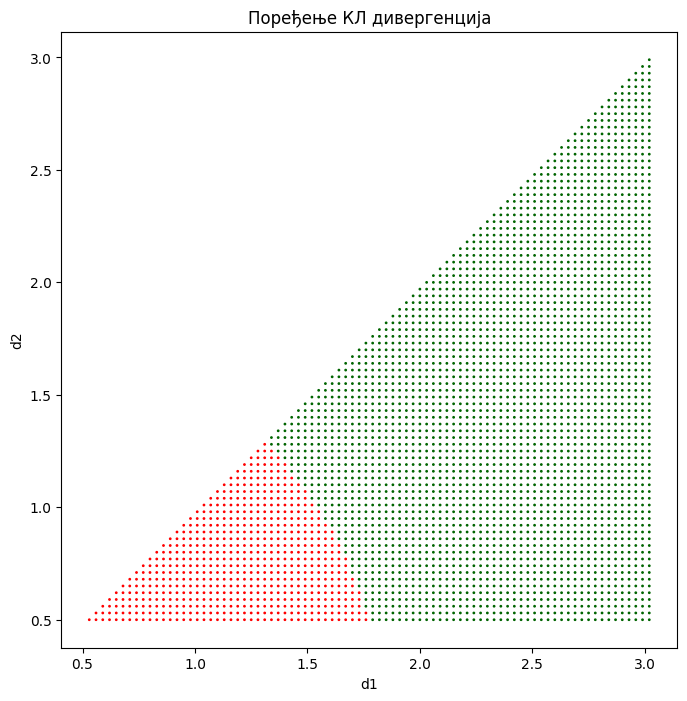

In [ ]:
# Plotting
colors = {True: 'darkgreen', False: 'red'}
plt.figure(figsize=(10, 8))
plt.scatter(d['d1'], d['d2'], c=d['claim'].apply(lambda x: colors[x]), s=1)
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('Поређење КЛ дивергенција')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()